<h2>The Boston Housing Dataset</h2>

<h4>The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:</h4>
<ul>
<li>CRIM - per capita crime rate by town</li>
<li>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li>INDUS - proportion of non-retail business acres per town.</li>
<li>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)</li>
<li>NOX - nitric oxides concentration (parts per 10 million)</li>
<li>RM - average number of rooms per dwelling</li>
<li>AGE - proportion of owner-occupied units built prior to 1940</li>
<li>DIS - weighted distances to five Boston employment centres</li>
<li>RAD - index of accessibility to radial highways</li>
<li>"TAX - full-value property-tax rate per 10000 USD </li>
<li>PTRATIO - pupil-teacher ratio by town</li>
<li>B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
<li>LSTAT - %lower status of the population </li>
<li>MEDV - Median value of owner-occupied homes in $1000's</li>
</ul>

<h2>Importing dependencies </h2>

In [1]:
#import dependecies
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

<h2>Importing dataset</h2>

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('Dataset/housing.csv', header=None, delimiter=r"\s+", names=column_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<h2>Checking for Null values</h2>

In [4]:
data.isnull().sum() #Dataset having no none values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<h2>Checking for outlier in data </h2>

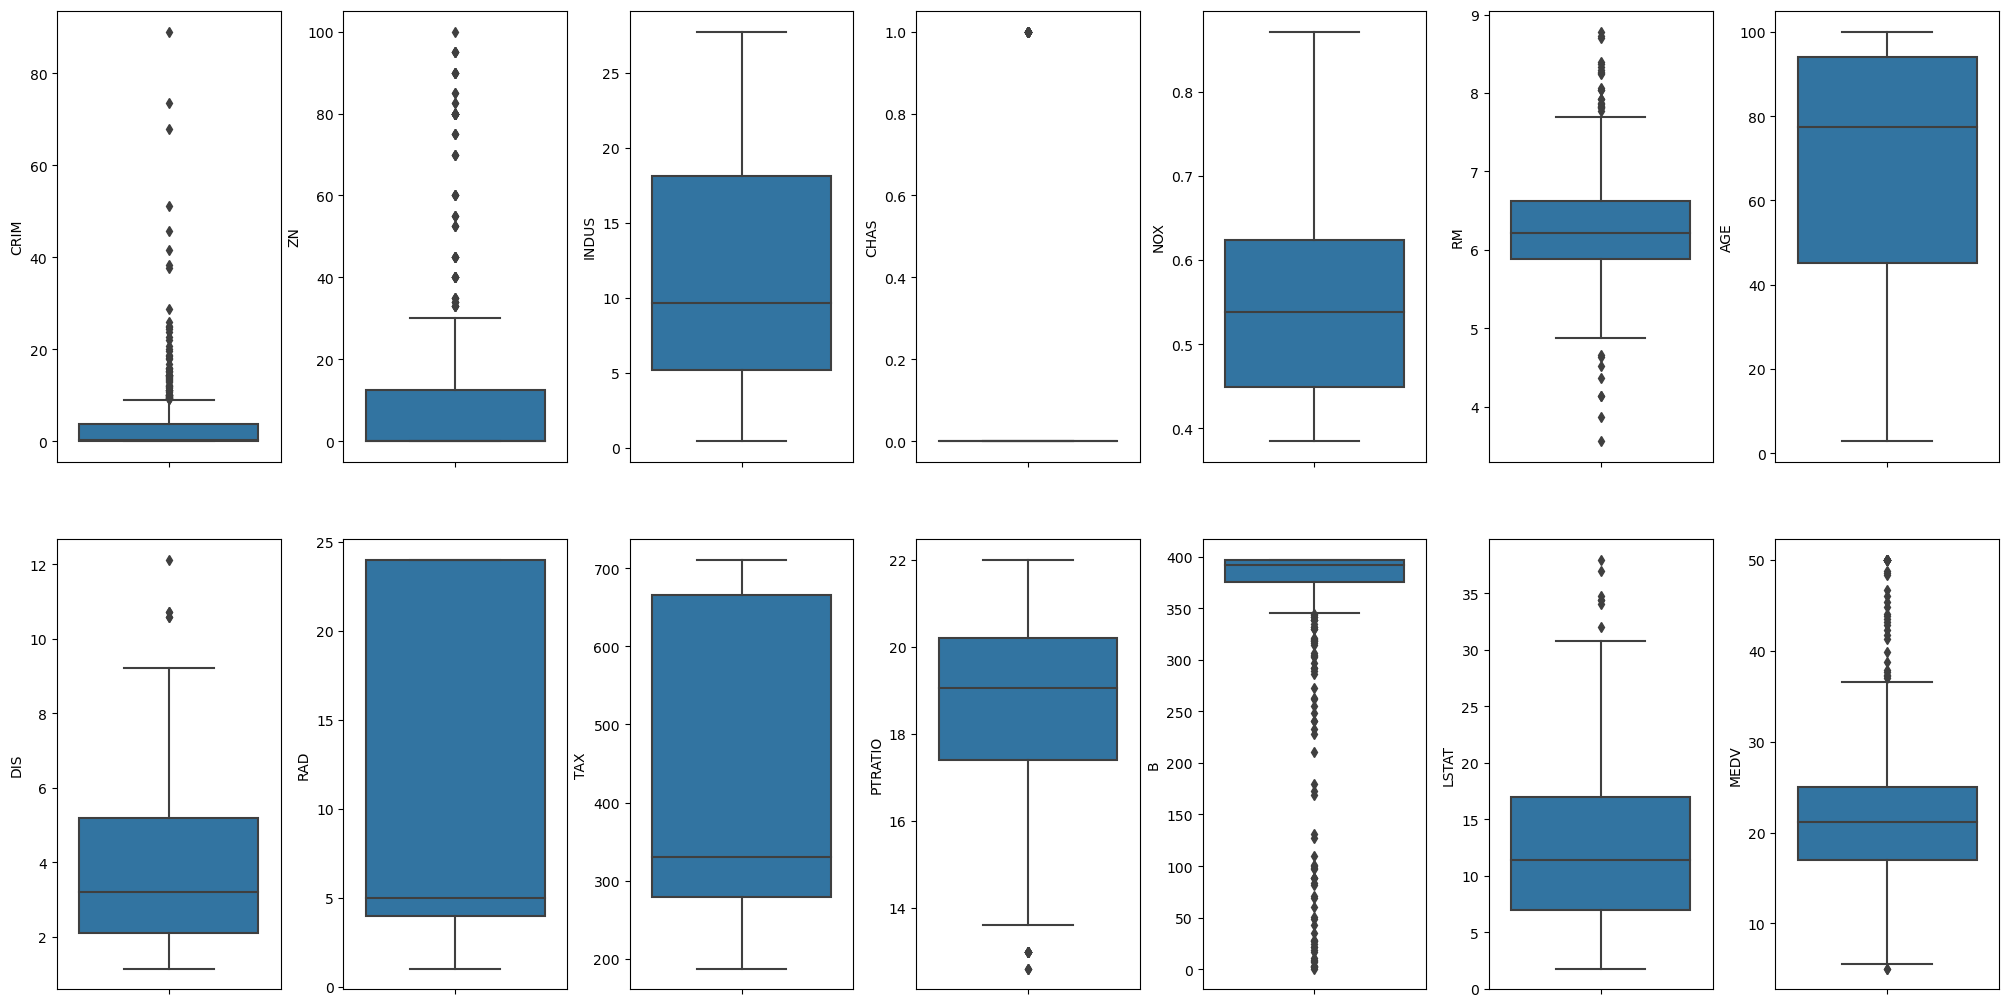

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Columns like CRIM, ZN, RM, B have outliers. Let's see the outliers percentage in every column.

In [6]:
#OUtlier percentage
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


<h2>Ploting distplot of all column Data</h2>

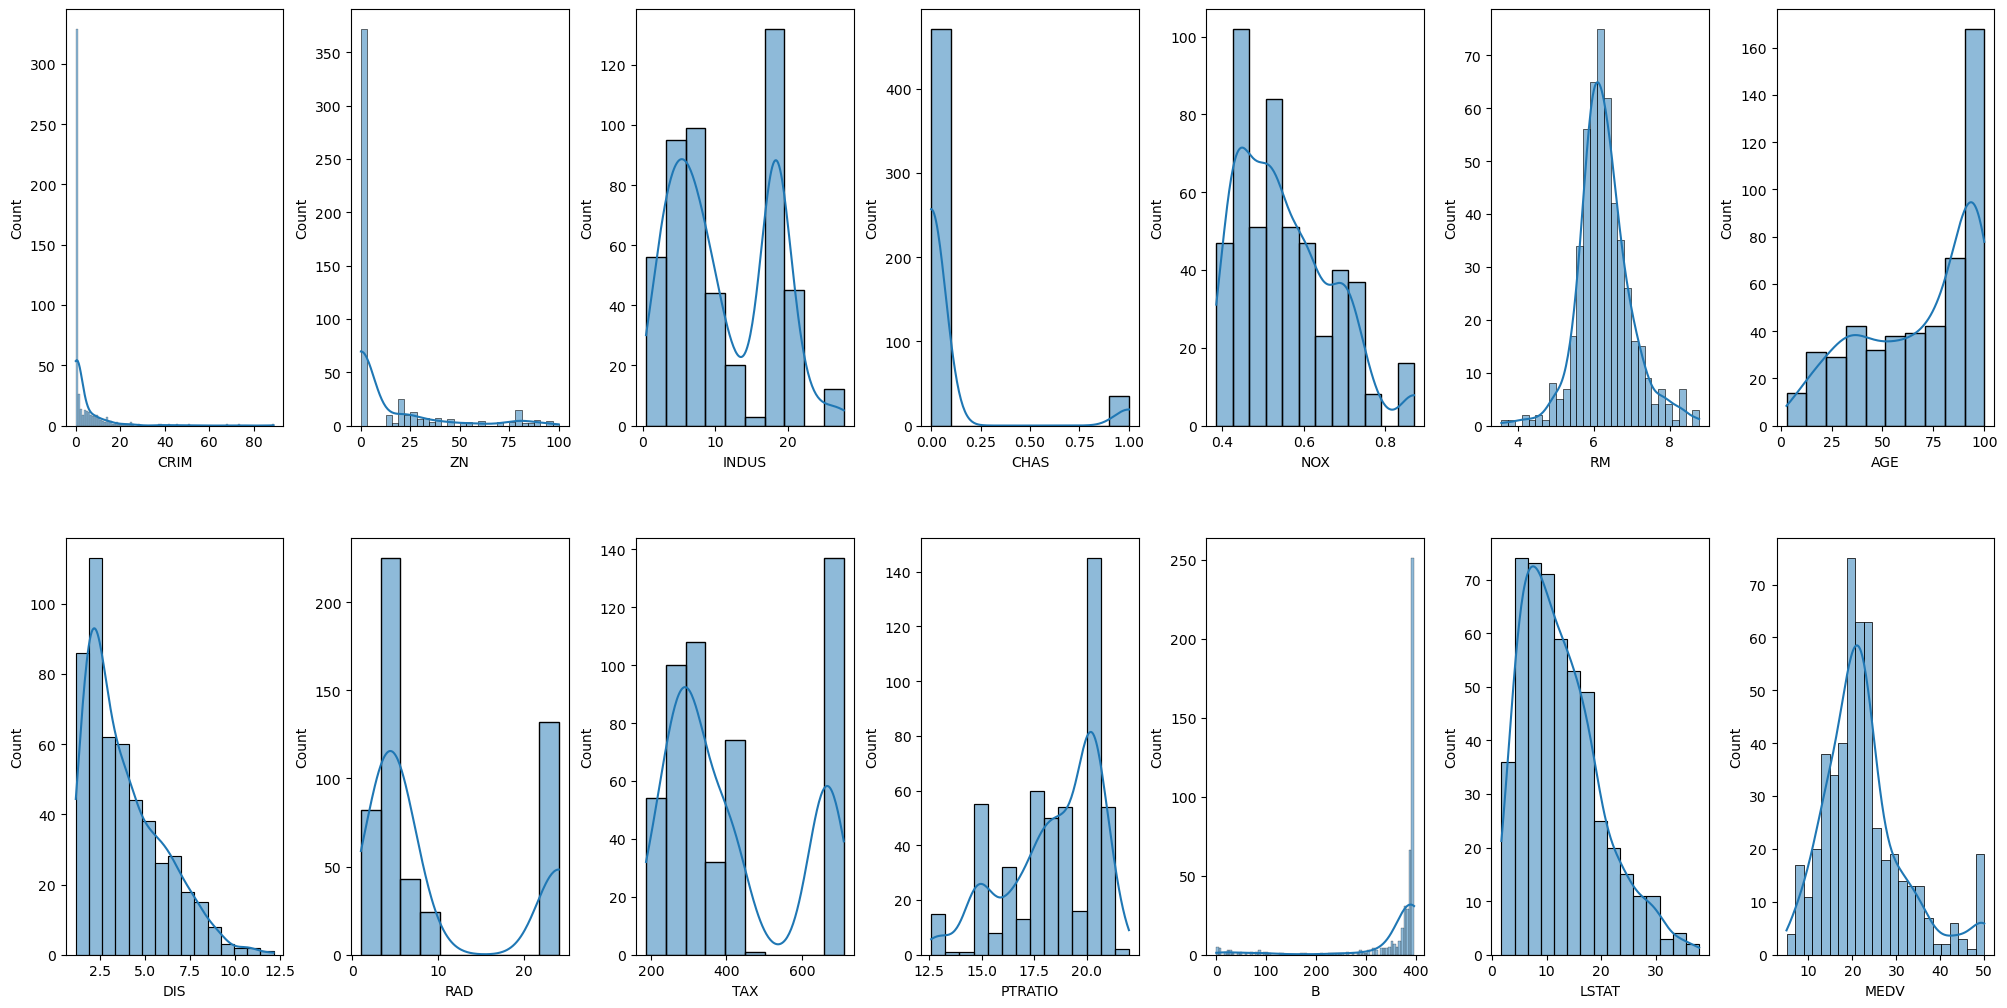

In [7]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index] ,kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<h2>Heatmap Of correlation data</h2>

<Axes: >

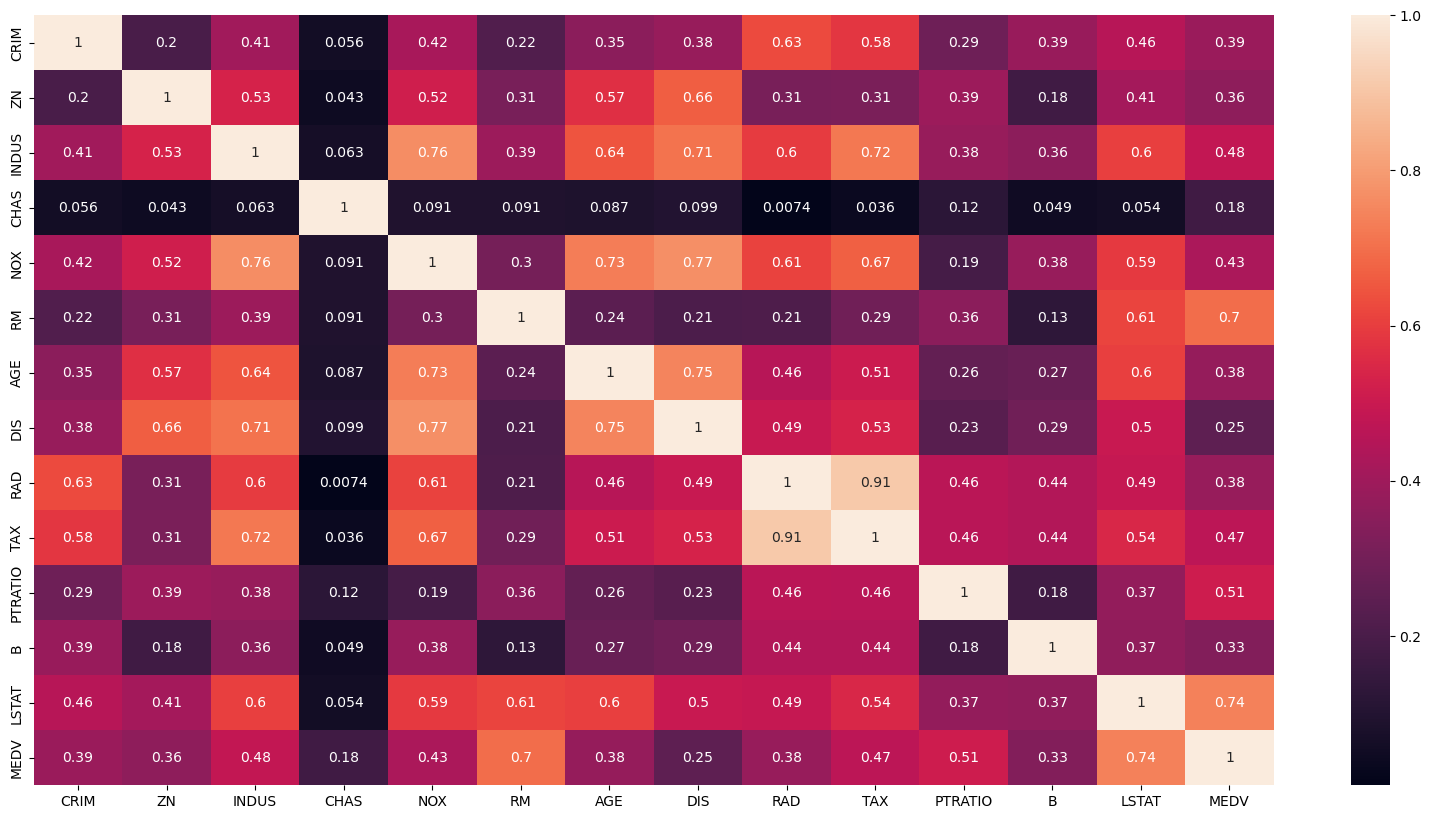

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

<h2>Extracting Target feasture from data</h2>

In [9]:
#dividing dataset into target(dependent variable) and dependent varible
target_coln="MEDV"

#seprate it from dataset
y=data[target_coln]

#Droping from main dataset / input features
x = data.drop(target_coln,axis=1)

y.shape ,x.shape

((506,), (506, 13))

<h2>Relation of rest of features with target feature</h2>

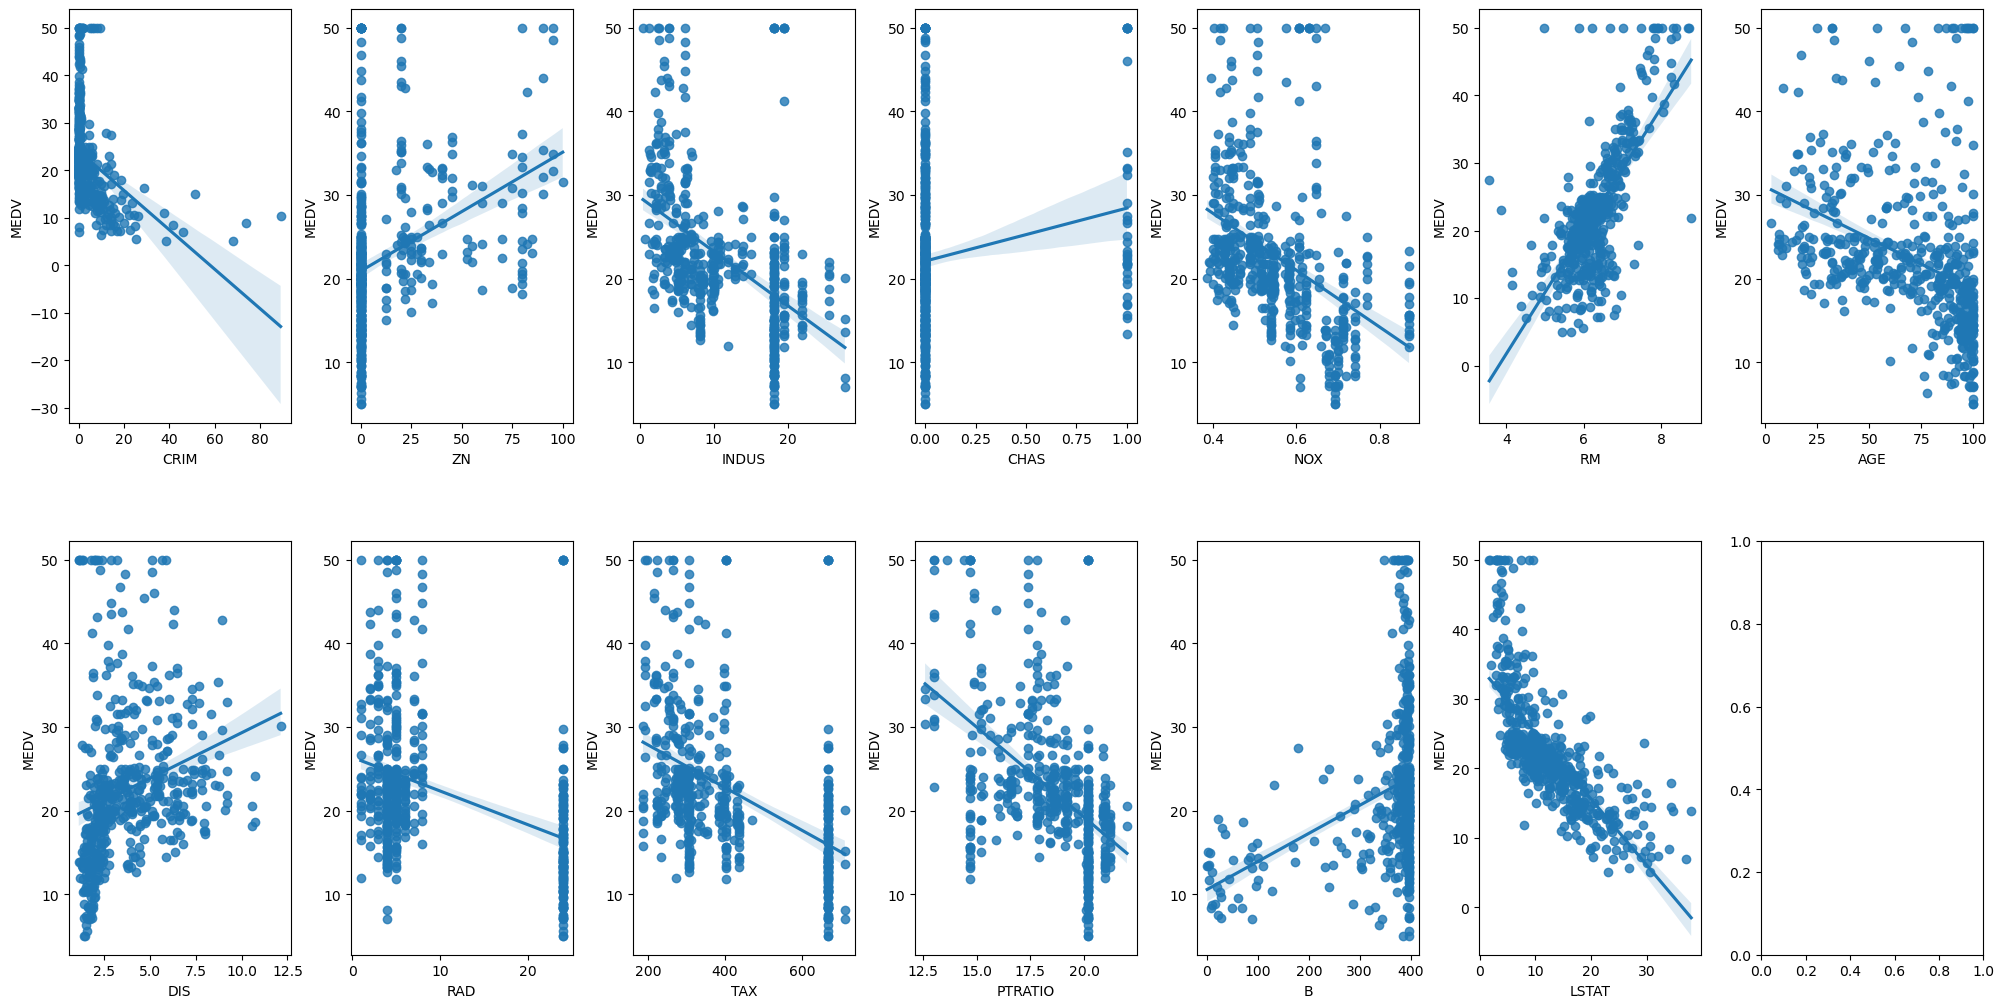

In [10]:
#ploting all independent column againts taget column MEDV
column = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

axs = axs.flatten()
for i, k in enumerate(column):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [11]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [12]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

<h2>Train Test split</h2>

In [13]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=7)

In [14]:
x_train.shape , x_test.shape

((404, 13), (102, 13))

In [15]:
y_train.shape , y_test.shape

((404,), (102,))

In [16]:
y_test

357    21.7
337    18.5
327    22.2
13     20.4
418     8.8
       ... 
413    16.3
408    17.2
80     28.0
451    15.2
26     16.6
Name: MEDV, Length: 102, dtype: float64

<h2>Model training</h2>

In [17]:
from sklearn.linear_model import LinearRegression
regresion=LinearRegression()

model=regresion.fit(x_train,y_train)

In [18]:
train_score=round(model.score(x_train,y_train)*100,2)
train_score

76.99

In [19]:
y_pred=model.predict(x_test)

In [20]:
from sklearn.metrics import r2_score
score=round(r2_score(y_test,y_pred)*100,2)
print("r2 score of model on test data is : {}".format(score))

r2 score of model on test data is : 57.85


<h2>DataFrame of Actual Value of Test Data and Predicted Value of Test Data </h2>

In [21]:
df=pd.DataFrame({'Actual_val':y_test,'Pred_val':y_pred,'Variance':y_test-y_pred})
df

,Actual_val,Pred_val,Variance
357,21.7,23.016076,-1.316076
337,18.5,19.175452,-0.675452
327,22.2,19.931333,2.268667
13,20.4,19.192223,1.207777
418,8.8,4.733661,4.066339
...,...,...,...
413,16.3,9.805358,6.494642
408,17.2,13.675562,3.524438
80,28.0,28.487892,-0.487892
451,15.2,20.270360,-5.070360


<h2>Graph Between Actual Value and Predicted value</h2>

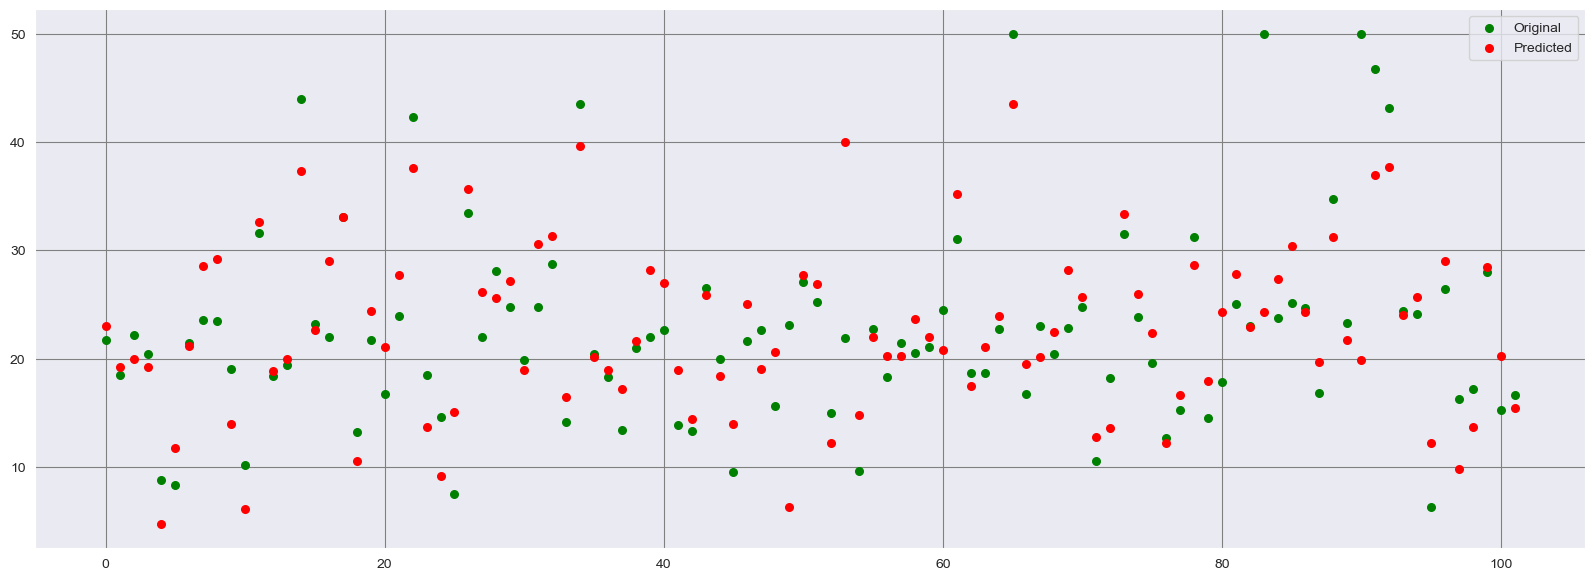

In [22]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=[20,7])
ax=fig.subplots()
x_as=range(len(x_test))
plt.scatter(x_as,y_test,s=30,color='green',label='Original',)
plt.scatter(x_as,y_pred,s=30,color='red',label="Predicted")
plt.legend()
plt.grid(color='grey')
plt.show()

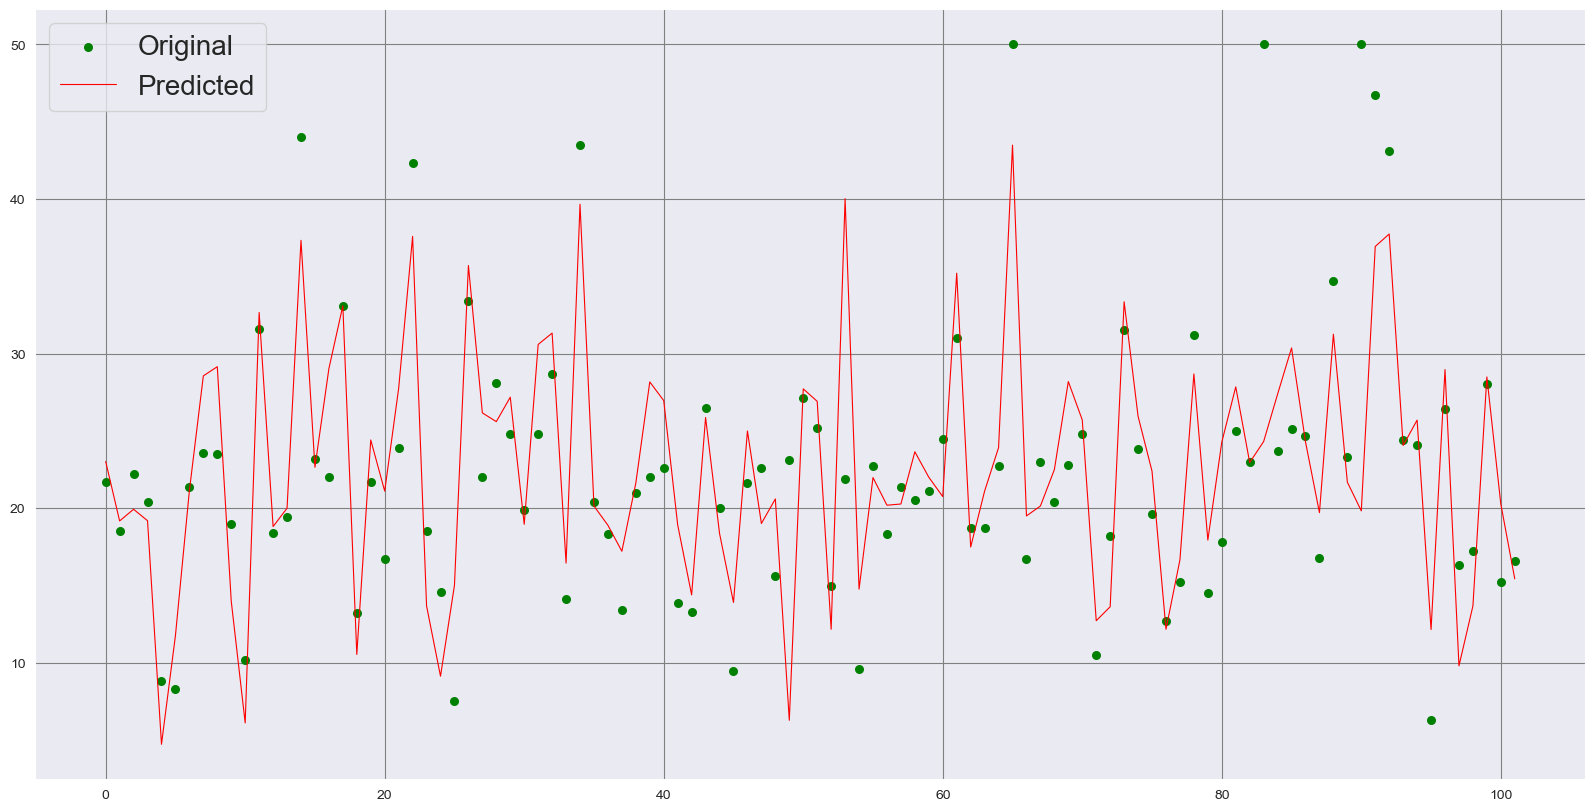

In [23]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=[20,10])
ax=fig.subplots()
x_as=range(len(x_test))
plt.scatter(x_as,y_test,s=30,color='green',label='Original',)
plt.plot(x_as,y_pred,lw=0.8,color='red',label="Predicted")
plt.legend(fontsize="20")
plt.grid(color='grey')
plt.show()

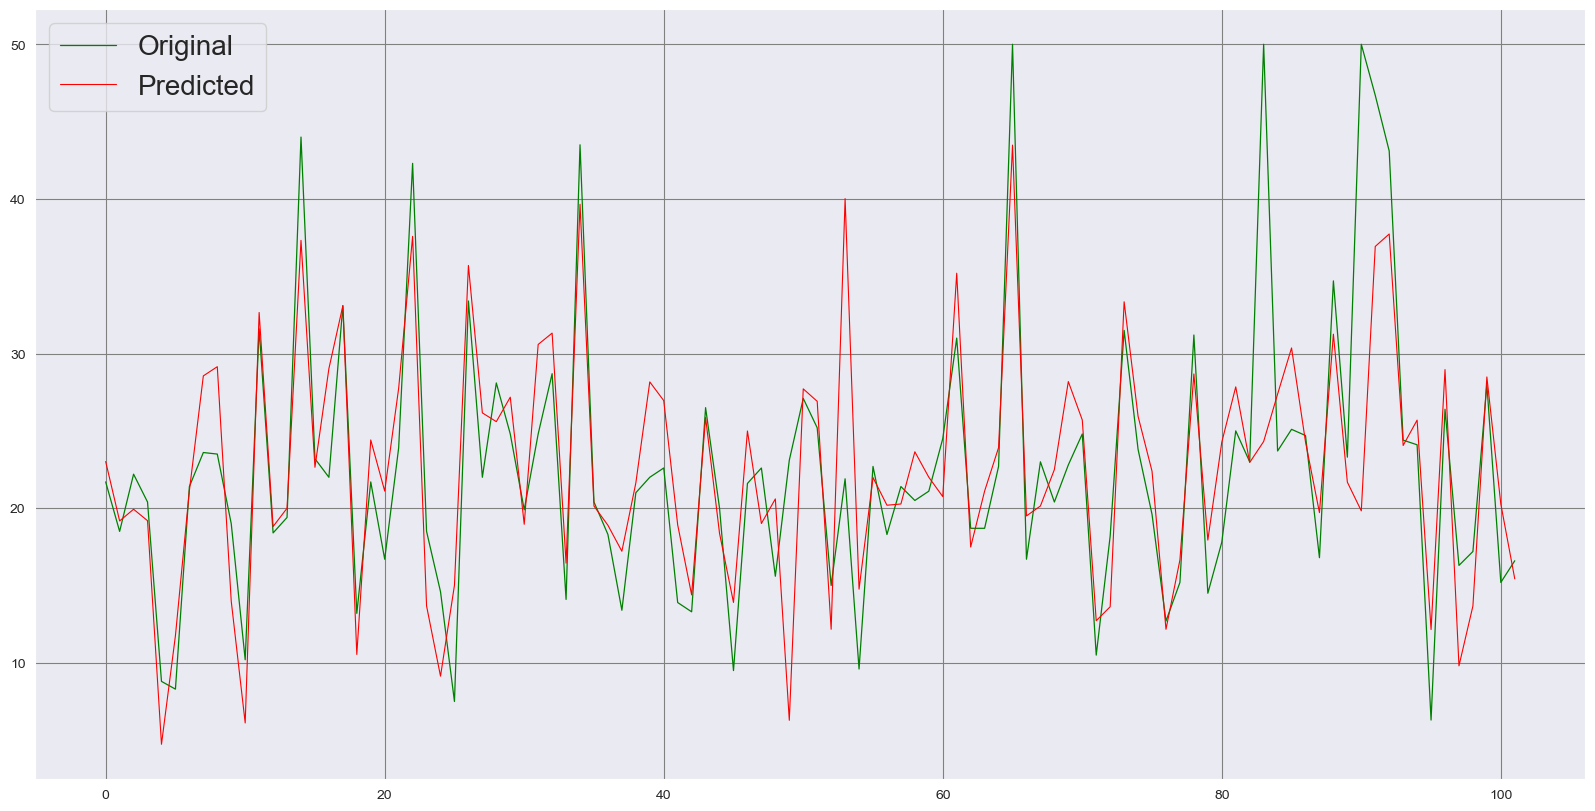

In [24]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=[20,10])
ax=fig.subplots()
x_as=range(len(x_test))
plt.plot(x_as,y_test,lw=0.9,color='green',label='Original',)
plt.plot(x_as,y_pred,lw=0.8,color='red',label="Predicted")
plt.legend(fontsize="20")
plt.grid(color='grey')
plt.show()

In [25]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
357,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666.0,20.2,391.34,13.27
337,0.03041,0.0,5.19,0,0.515,5.895,59.6,5.6150,5,224.0,20.2,394.81,10.56
327,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287.0,19.6,396.90,12.79
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307.0,21.0,396.90,8.26
418,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666.0,20.2,16.45,20.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.65580,0.0,18.10,0,0.597,5.155,100.0,1.5894,24,666.0,20.2,210.97,20.08
408,7.40389,0.0,18.10,0,0.597,5.617,97.9,1.4547,24,666.0,20.2,314.64,26.40
80,0.04113,25.0,4.86,0,0.426,6.727,33.5,5.4007,4,281.0,19.0,396.90,5.29
451,5.44114,0.0,18.10,0,0.713,6.655,98.2,2.3552,24,666.0,20.2,355.29,17.73


<h2>Prediction on random value taken from x_test data</h2>

In [28]:
#Testing model by giving random input from Testing data

print("Tha actual value of that input is 16.6")
model.predict([[0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81]]) #actual value is 16.6

Tha actual value of that input is 16.6


C:\Users\pk877\anaconda3\envs\mlpr\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.43116443])

<h2>Error's in prediction of models</h2>

In [27]:
print("Mean absolute error on test data : {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("Mean squared error on test data : {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("Mean root mean squared error on test data : {}".format(np.sqrt(metrics.mean_absolute_error(y_test,y_pred))))

Mean absolute error on test data : 3.7807629091749546
Mean squared error on test data : 34.05648134887451
Mean root mean squared error on test data : 1.9444183986927697


<h1>END</h1>